<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/New-Approch-TascaM3_02/Tasca_M3_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exercise 1

Download the data set Airlines Delay: Airline on-time statistics and delay causes and load it into a Pandas Dataframe. Explore the data it contains, briefly explain which variables are there and stick only to the columns you consider relevant. Justify your choice.

### Important

The dimension of the dataset must be randomly reduced in order to obtain a 200,000 record only version. All exercises should be done on this reduced dataset.

### Airline Dataset Variables description:

Below follows a table with the Airline Dataset Variables definition.\
IATA:  International Air Transport Association\
NAS : National Aviation System\
Carrier: an organization transporting passengers and cargo by aircraft \
Delay causes:
- Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
- Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.



| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64  
| 1 | Year | year of the flight | int64  
| 2 | Month | month of the flight | int64  
| 3 | DayofMonth| day of the month (1 to 31) | int64  
| 4 | DayOfWeek| day of the week 1 (Monday) - 7 (Sunday)| int64  
| 5 | DepTime| actual departure time (local, hhmm) |float64
| 6 | CRSDepTime| scheduled departure time (local, hhmm | int64  
| 7 | ArrTime |  actual arrival time (local, hhmm) |float64
| 8 | CRSArrTime | scheduled arrival time (local, hhmm) |int64  
| 9 | UniqueCarrier | carrier ID:a four-character unique identifier that is assigned by the CBSA to identify a carrier |object 
| 10 | FlightNum | flight number | int64  
| 11 | TailNum| plane tail number: an alphanumeric code between two and six characters in length used to identify a specific airplane | object |
| 12 | ActualElapsedTime| actual elapsed time of the flight, in minutes |float64
| 13 | CRSElapsedTime | scheduled elapsed time of the flight, in minutes   | float64
| 14 | AirTime | airborne time for the flight, in minutes | float64
| 15 | ArrDelay | arrival delay, in minutes | float64
| 16 | DepDelay | departure delay, in minutes |  float64|
| 17 | Origin| origin IATA airport code | object 
| 18 | Dest  | destination IATA airport code | object 
| 19 | Distance |Distance between airports (miles) | int64  
| 20 | TaxiIn | taxi time from wheels down to arrival at the gate, in minutes | float64
| 21 | TaxiOut| taxi time from departure from the gate to wheels up, in minutes | float64
| 22 | Cancelled  | cancellation status (0 , 1 where 1 is TRUE) | int64  
| 23 | CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |object |
| 24 | Diverted| diversion status (0 , 1 where 1 is TRUE) | int64  
| 25 | CarrierDelay| in minutes | float64
| 26 | WeatherDelay| in minutes | float64
| 27 | NASDelay | in minutes | float64
| 28 | SecurityDelay| in minutes | float64
| 29 | LateAircraftDelay| in minutes |float64


---
Columns NOT considered relevant are:

| Number | Name | Description |Data type
| ----------- | ----------- | ----------- |----------- |
| 0 | Unnamed: 0 | unknown |int64 |
| 10 | FlightNum | flight number | int64  
| 11 | TailNum| plane tail number: an alphanumeric code between two and six characters in length used to identify a specific airplane | object |






Interesting article:
https://towardsdatascience.com/performing-data-analytics-on-the-flights-delay-dataset-using-the-polars-library-284f385cc497

Reducing size:https://www.skytowner.com/explore/reducing_dataframe_memory_size_in_pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))

df = df.sample(n=200000)

#df.drop(df.loc[:,'TaxiIn':'Diverted'].columns, axis=1)

df.drop(df.columns[[0]], axis=1, inplace=True)
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1433244,2008,9,11,4,1933.0,1910,2044.0,2025,WN,1675,...,6.0,5.0,0,N,0,3.0,0.0,0.0,0.0,16.0
1772069,2008,12,30,2,1653.0,1645,1846.0,1850,WN,3237,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
598071,2008,4,27,7,1155.0,1135,1427.0,1415,WN,3251,...,7.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1410431,2008,8,16,6,56.0,40,344.0,326,B6,749,...,6.0,17.0,0,N,0,16.0,0.0,2.0,0.0,0.0
759881,2008,5,16,5,1459.0,1430,1546.0,1516,XE,502,...,6.0,11.0,0,N,0,15.0,0.0,1.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103099,2008,1,13,7,1952.0,1945,2045.0,2050,EV,4403,...,3.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1799579,2008,12,17,3,2247.0,2222,11.0,2348,OO,5497,...,6.0,19.0,0,N,0,6.0,0.0,0.0,0.0,17.0
1550266,2008,10,1,3,1830.0,1630,1947.0,1750,YV,2698,...,7.0,3.0,0,N,0,117.0,0.0,0.0,0.0,0.0
194139,2008,2,10,7,1921.0,1710,2047.0,1830,WN,406,...,14.0,12.0,0,N,0,0.0,0.0,78.0,0.0,59.0


### - Exercise 2

Do a full dataset report:

    Statistically summarize the dataset and columns of interest. Do a statistical analysis of what you consider relevant.
    Find how much missing data there is per column.
    Create new columns (average flight speed, whether it was late or not...).
    Make a table of the airlines with the most accumulated delays.
    What are the longest flights? And the most delayed? Look for the longest routes and those with the most delays.
    Contribute what you consider relevant.

https://rstudio-pubs-static.s3.amazonaws.com/517005_a01d01a573f2474886128f79d9ee0244.html

Find how much missing data there is per column:

In [3]:
display(df.isnull().sum())

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                769
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  1
ActualElapsedTime      911
CRSElapsedTime          19
AirTime                911
ArrDelay               911
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 769
TaxiOut                 49
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71081
WeatherDelay         71081
NASDelay             71081
SecurityDelay        71081
LateAircraftDelay    71081
dtype: int64

Create new columns (average flight speed, whether it was late or not...).

In [4]:
#create columns
df['delay'] = ((df['DepDelay'])+(df['ArrDelay'])) #total delay column for a flight (Departure + Arrival delay)
df['dep_hour_standard'] = df['DepTime']/100*1.0386100 #departure standard time column
df['Date']= pd.to_datetime(pd.DataFrame({'year':df['Year'],
                                         'month':df['Month'],'day':df['DayofMonth'], 
                                         'hour':df['dep_hour_standard']})) #date column

df['dep_hour_int'] = (df['DepTime']/100).astype(int) #departure time column (in integer)
df['Date_bin']= pd.to_datetime(pd.DataFrame({'year':df['Year'],
                                             'month':df['Month'],'day':df['DayofMonth'], 
                                             'hour':df['dep_hour_int']})) #date column in bins

df.head() #explore new columns

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
1433244,2008,9,11,4,1933.0,1910,2044.0,2025,WN,1675,...,3.0,0.0,0.0,0.0,16.0,42.0,20.076331,2008-09-11 20:04:34.792680000,19,2008-09-11 19:00:00
1772069,2008,12,30,2,1653.0,1645,1846.0,1850,WN,3237,...,NaN,NaN,NaN,NaN,NaN,4.0,17.168223,2008-12-30 17:10:05.603880000,16,2008-12-30 16:00:00
598071,2008,4,27,7,1155.0,1135,1427.0,1415,WN,3251,...,NaN,NaN,NaN,NaN,NaN,32.0,11.995946,2008-04-27 11:59:45.403800000,11,2008-04-27 11:00:00
1410431,2008,8,16,6,56.0,40,344.0,326,B6,749,...,16.0,0.0,2.0,0.0,0.0,34.0,0.581622,2008-08-16 00:34:53.837759999,0,2008-08-16 00:00:00
759881,2008,5,16,5,1459.0,1430,1546.0,1516,XE,502,...,15.0,0.0,1.0,0.0,14.0,59.0,15.153320,2008-05-16 15:09:11.951640000,14,2008-05-16 14:00:00


In [5]:
#details of delay related columns
del_info = df[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
               'LateAircraftDelay']] #select columns
del_info.rename(columns={'ArrDelay': 'Arrival delay', 'DepDelay': 'Departure Delay',
                         'CarrierDelay':'Carrier Delay','WeatherDelay':'Weather Delay',
                         'NASDelay': 'NAS Delay', 'SecurityDelay': 'Security Delay',
                         'LateAircraftDelay':'Late Aircraft Delay',
                         'delay':'Total Delay'}, inplace=True) #rename columns
del_info = del_info.describe().T #describe and transpose delay information

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
#export to image
chromedriver_path = '/gdrive/../content/chromedriver'
import dataframe_image as dfi
del_info_style = del_info.style.format("{:.12}").background_gradient() #style table
dfi.export(del_info_style,"EDA_table1.png") #export to img
del_info_style

,count,mean,std,min,25%,50%,75%,max
Arrival delay,199089.0,42.3831854095,57.2812120475,-68.0,9.0,25.0,56.0,2453.0
Departure Delay,200000.0,43.35193,53.8382023106,6.0,12.0,24.0,54.0,2467.0
Carrier Delay,128919.0,19.2578828567,44.404069195,0.0,0.0,2.0,21.0,2436.0
Weather Delay,128919.0,3.71824944345,21.6337065441,0.0,0.0,0.0,0.0,1148.0
NAS Delay,128919.0,15.0454006004,33.4726529113,0.0,0.0,2.0,15.0,872.0
Security Delay,128919.0,0.096029289709,2.06179296285,0.0,0.0,0.0,0.0,191.0
Late Aircraft Delay,128919.0,25.4137714379,42.1744508521,0.0,0.0,8.0,33.0,759.0


In [9]:
#explore departure delays (i.e. outlier, etc.)
print(df["DepDelay"][(df["DepDelay"] <0)].count())
print(df["DepDelay"][(df["DepDelay"] < -1000)].count())
print(df["DepDelay"][(df["DepDelay"] >2000)].count())

#explore arrival delays
print(df["ArrDelay"][(df["ArrDelay"] <0)].count())
print(df["ArrDelay"][(df["ArrDelay"] < -400)].count())
print(df["ArrDelay"][(df["ArrDelay"] >2000)].count())

0
0
1
18445
0
1


In [10]:
#explore departure and arrival max outliers
exp_del = df[['UniqueCarrier','TailNum','DepDelay','ArrDelay']]
exp_del = exp_del[(exp_del["ArrDelay"] >1000) & (exp_del["DepDelay"] >1000)]

#export outlier table
exp_del_style = exp_del.style.format("{:.12}").background_gradient() #style table
dfi.export(exp_del_style,"EDA_table1_2.png") #export to img
exp_del_style 


,UniqueCarrier,TailNum,DepDelay,ArrDelay
340219,AA,N520AA,1070.0,1088.0
521096,NW,N786NC,1490.0,1490.0
1902540,AA,N3DBAA,1136.0,1134.0
350073,AA,N5DHAA,1216.0,1292.0
860347,AA,N283AA,1004.0,1008.0
545651,AA,N5DVAA,1016.0,1017.0
1509454,AA,N074AA,1018.0,1047.0
1490123,MQ,N617AE,1001.0,1012.0
517172,NW,N593NW,1198.0,1202.0
686014,NW,N3324L,2467.0,2453.0


In [11]:
#total no. of flights ontime, and delayed
delay_perc = (df['delay']<=0) #true: before or ontime, false: delayed
delay_perc.value_counts() #count

False    194619
True       5381
Name: delay, dtype: int64

In [12]:
#manual math cell: percentage of delayed flights
tot_flights = (194611+5389)
del_flights = 194611
ont_flights = 5389
perc=del_flights/tot_flights
perc2=ont_flights/tot_flights
print("Percentage of flights that are delayed: {:.00%}".format(perc))
print("Percentage of flights that are ontime: {:.00%}".format(perc2))

Percentage of flights that are delayed: 97%
Percentage of flights that are ontime: 3%


In [13]:
#change the total delay threshold to 10 minutes:
delay_perc2 = (df['delay']<=10) #10 min delay or less.
delay_perc2.value_counts() #count

False    178729
True      21271
Name: delay, dtype: int64

In [14]:
#manual math cell: percentage of delayed flights (10min  threshold)
tot_flights = (178718+21282)
del_flights = 21282
ont_flights = 178718
perc=del_flights/tot_flights
perc2=ont_flights/tot_flights
print("Percentage of flights that are delayed: {:.00%} - (10min threshold)".format(perc))
print("Percentage of flights that are ontime: {:.00%} - (10min threshold)".format(perc2))


Percentage of flights that are delayed: 11% - (10min threshold)
Percentage of flights that are ontime: 89% - (10min threshold)


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#set plotting style for notebook
sns.reset_orig()
plt.style.use('seaborn-colorblind')
sns.set_style("whitegrid")

In [17]:
#plot delays

#data prep for plot
#percentage of delays converted to true/false values
delay_perc_plot = pd.DataFrame() #empty df
delay_perc_plot['Status']=df['delay']<=0 #column with delay status
for col in delay_perc_plot.columns[delay_perc_plot.dtypes == 'bool']:
    delay_perc_plot['Status'] = delay_perc_plot['Status'].map({True: 'On time', False: 'Delayed'}) #convert to boolean

In [18]:
#percentage of delays with a 10 min threshold (true/false)
delay_perc_plot_10 = pd.DataFrame() #cempty df
delay_perc_plot_10['Status_10min_int']=df['delay']<10 #10min threshold
for col in delay_perc_plot_10.columns[delay_perc_plot_10.dtypes == 'bool']:
    delay_perc_plot_10['Status_10min_int'] = delay_perc_plot_10['Status_10min_int'].map({True: 'On time', False: 'Delayed'}) #convert to boolean


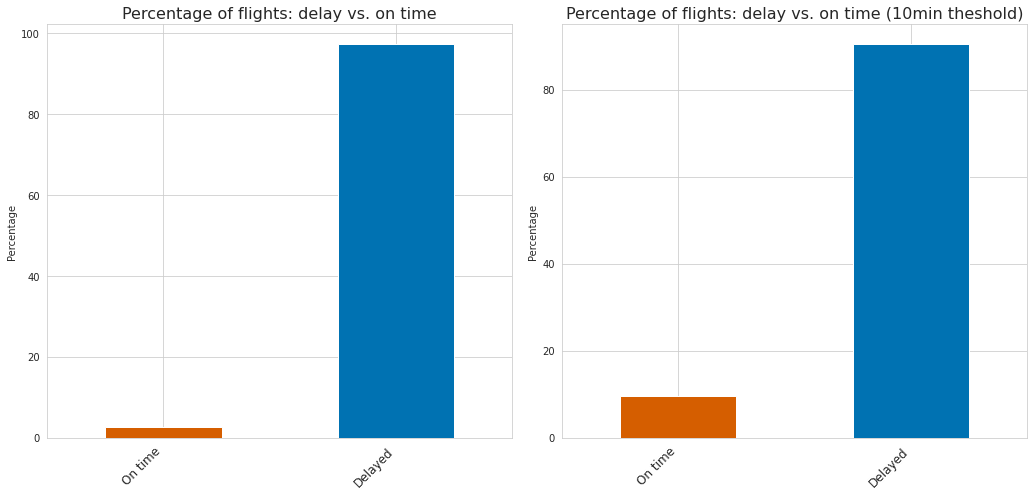

In [19]:
#combined plot
f, ax = plt.subplots(1,2,figsize=(15, 7))

palette=['C2','C0'] #set colour

(delay_perc_plot['Status'].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar', ax=ax[0], color=palette) #plot in percentage
(delay_perc_plot_10['Status_10min_int'].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar', ax=ax[1], color=palette) #plot in percentage
#set labels
ax[0].set_title("Percentage of flights: delay vs. on time",fontsize = 16) #title ax0
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax0
ax[0].set(ylabel="Percentage")
ax[1].set_title("Percentage of flights: delay vs. on time (10min theshold)",fontsize = 16) #title ax1
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax1
ax[1].set(ylabel="Percentage")
plt.tight_layout() #tight layout
plt.style.use('seaborn-colorblind')
plt.show() #plot

In [21]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

pandas_profiling.__version__

#path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
#data = pd.read_csv(path)
#data.head()

profile = ProfileReport(df, title="Flight Delays", html={'style': {'full_width': True}}, sort="ascending")

profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### - Exercise 3

Export the dataset clean and with the new columns to Excel.

In [ ]:
 df.to_csv('mydataframe.csv', sep='\t')

In [ ]:
df.to_csv('/content/drive/My Drive/Delayed_Flights_processed.csv', encoding='utf-8', index=False)